<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Learning_to_Discover_Cross_Domain_Relations_with_Generative_Adversarial_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Learning to Discover Cross-Domain Relations with Generative Adversarial Networks**

논문 링크: https://arxiv.org/abs/1703.05192

DiscoGAN은 CycleGAN과 발상이 거의 똑같다. 사실상 그냥 같다고 봐도 된다.심지어 두 논문 모두 한국에서 나왔으며 시기 또한 겹친다.

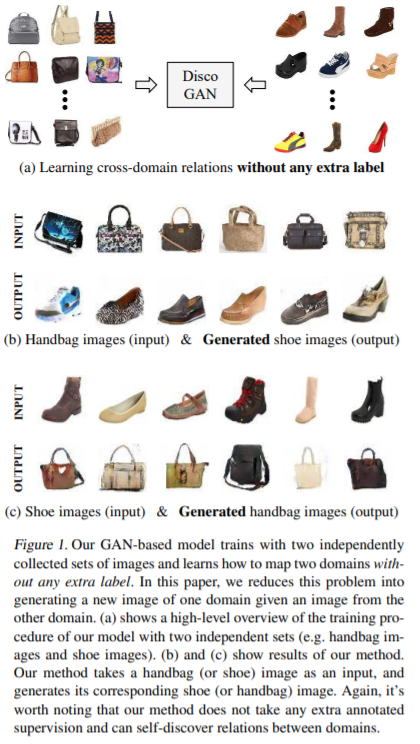

CycleGAN의 발상과 동일하다고 언급했듯이 Pix2Pix의 한계점인 input과 label이 한 쌍으로 붙어있는 paired data가 필요하다. 이는 매우 큰 제약인데, 그 이유는 style transfer와 같이 화가들의 그림체를 이미지에 적용시킬려면 그에 따른 paired data가 필요하다. 하지만, 고흐와 같은 유명한 화가들은 이미 돌아가셨으며 살아계신다고 가정해도 이 분들을 고용하는데에는 큰 어려움이 따른다. 따라서 위의 그림 Figure 1에 나와있는 DiscoGAN의 결과물을 보면 알 수 있듯이 CycleGAN과 같이 DiscoGAN 또한 이러한 문제점들을 해결하였다. 

## **DiscoGAN 구조**

### **Architecture**

CycleGAN과 마찬가지로 먼저 Architecture에 대해 알아보겠다.

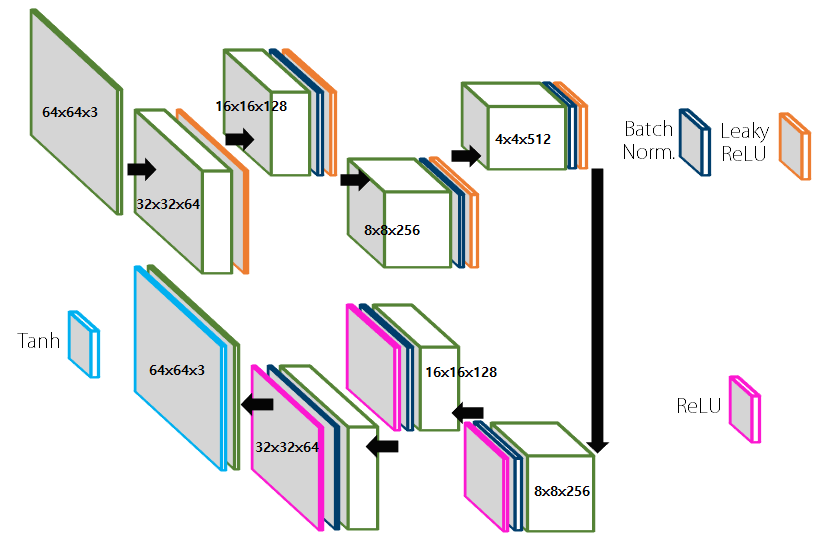

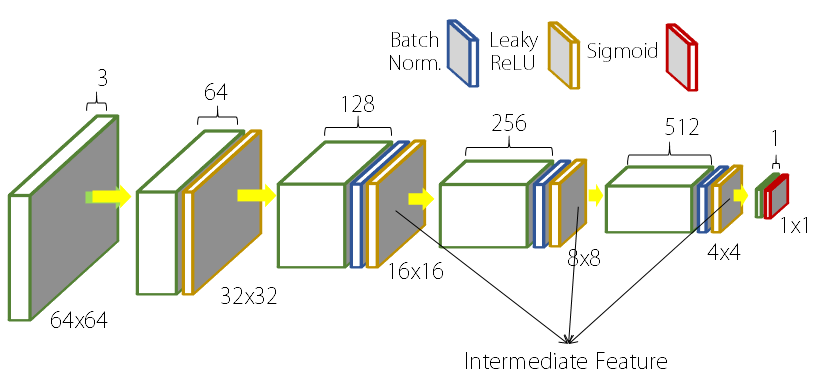

(출처: https://github.com/taeoh-kim/Pytorch_DiscoGAN)

위의 그림 순서대로 각각 Generator와 Discriminator이다.

### **Loss function**

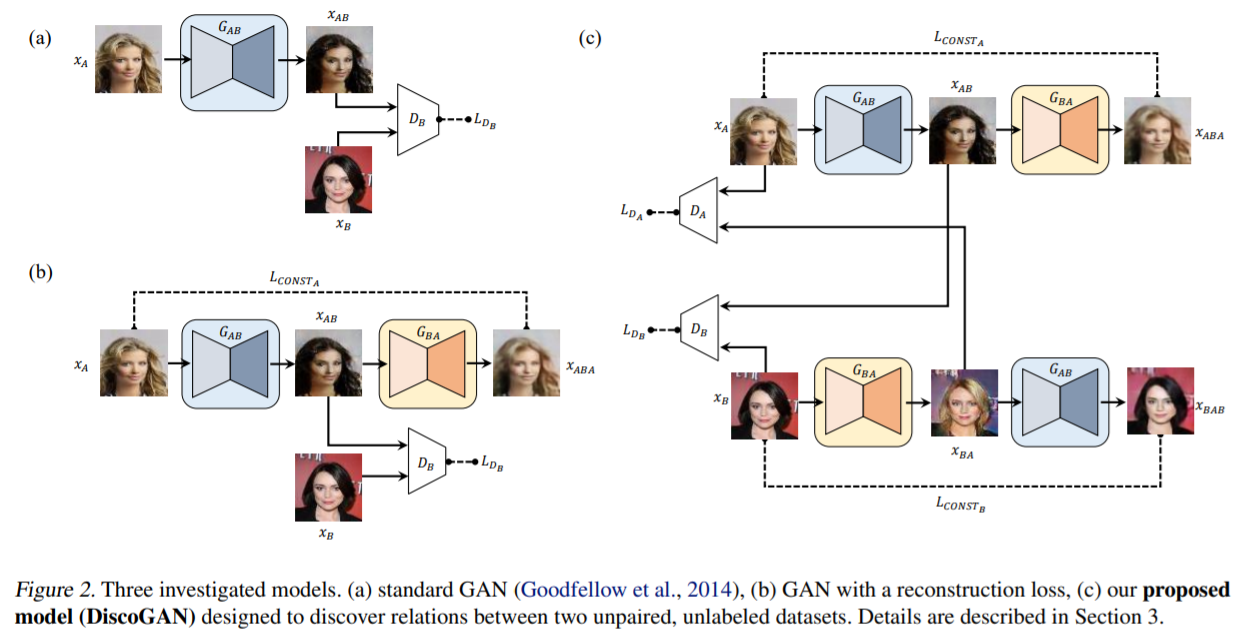

위의 그림 Figure 2에 DiscoGAN의 아이디어가 나와있다. 먼저 (a) 부분만 보면 Pix2Pix와 별반 다르지 않다. G_AB는 금발 여성의 image를 input으로 받아 흑발 여성의 image로 바꾼다. 그리고 D_B에서 실제 흑발 여성과 G_AB가 만든 흑발 여성을 input으로 받아 adversarial training이 가능해진다. 하지만 만일 여기까지만 학습이 된다면, G_AB는 금발의 여성의 이미지는 생성이 가능하지만 어떤 표정이나 detail적인 요소가 포함된 금발의 여성은 Pix2Pix처럼 Ground Truth가 없기 때문에 생성할 수 없다.

따라서 (b) 부분과 같이 G_BA라는 추가적인 generator가 등장한다. G_BA는 G_AB가 만든 image를 다시 흑발로 바꾼다. 즉, 학습이 잘된 G_BA는 다시 G_AB에 넣었던 input과 같은 image이어야 한다. 이를 위해 **Consistency Loss**를 추가하여 generator가 생성한 image를 다시 다른 generator에 넣어 생성한 image(EX. G_AB(G_BA(input)))와 input를 비교한다. CycleGAN에서는 이를 위해 L1-Loss를 사용하고, DiscoGAN의 경우는 L2_Loss를 사용한다. 이렇게 consistency loss를 추가한 덕분에 다시 원본으로 돌아올 것까지 생각해야하기 때문에 함부로 아무 금발 image로 변경할 수 없다.

그리고 (c) 부분과 같이 대칭적인 구조를 추가해줬다. 이렇게 대칭적인 구조를 추가한 이유는 만일 (b) 부분과 같이 G_AB가 만든 image에 대해서만 discriminator가 판단을 하고 G_BA에 대해서는 discriminator가 판단을 하지 않으면 안정적인 학습이 되지 않는다고 판단해 (c) 부분과 같이 G_BA를 판단하는 discriminator도 추가해주었다.

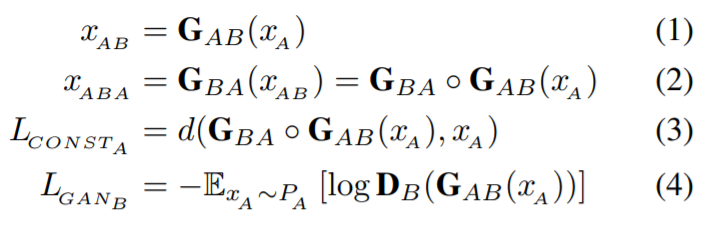

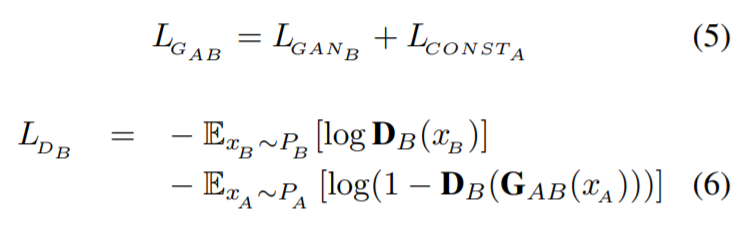

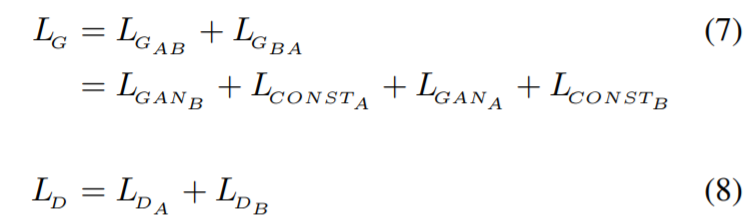

위에서 설명한 것을 수식으로 나타내면 위와 같이 된다. 사실 CycleGAN과 상당히 유사하기 때문에 수식에 대한 자세한 설명은 생략한다.

## **Experiments**

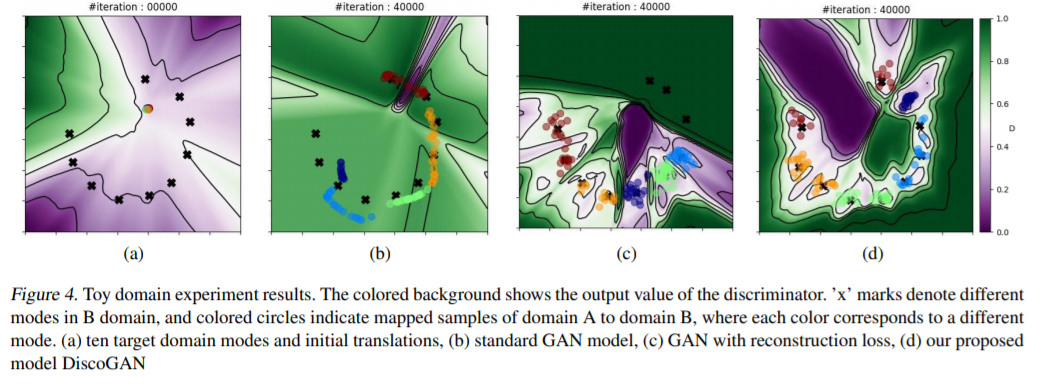

위의 그림 FIgure 4는 discriminator의 출력값을 보여준다. (b)는 standard gan, (c)는 gan + reconstruction loss이고 (d)는 DiscoGAN이다. 위의 실험을 통해 50000번의 훈련에서 도메인 단순성으로 인해 DiscoGAN이 훨씬 일찍 수렴되는 것을 알 수 있다. 

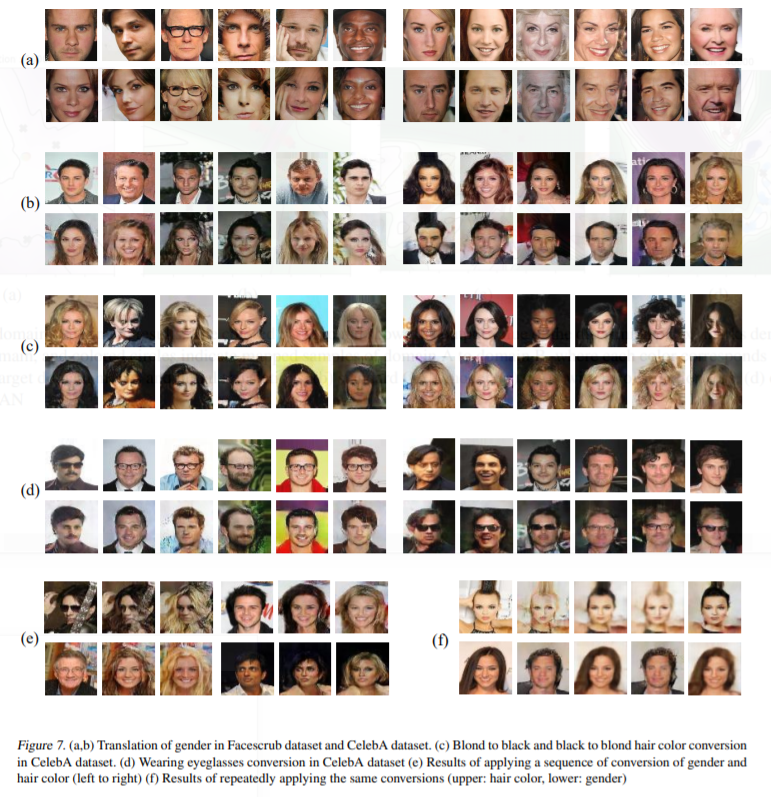

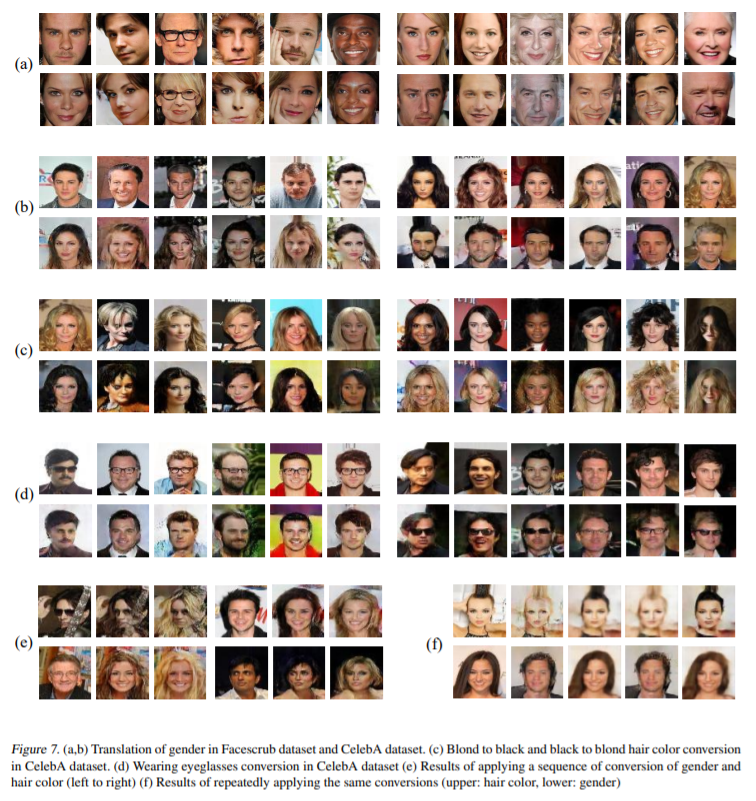

위의 그림 Figure 7은 Facescrub dataset과 CelebA dataset에 대한 실험 결과이다. (a), (b)는 성별, (c)는 금발/흑발, (d)는 안경의 유무, (e)는 성별 및 머리 색깔 그리고 (f)는 동일한 변환(상단은 머리 색깔, 하단은 성별)을 반복적으로 적용한 결과이다. 

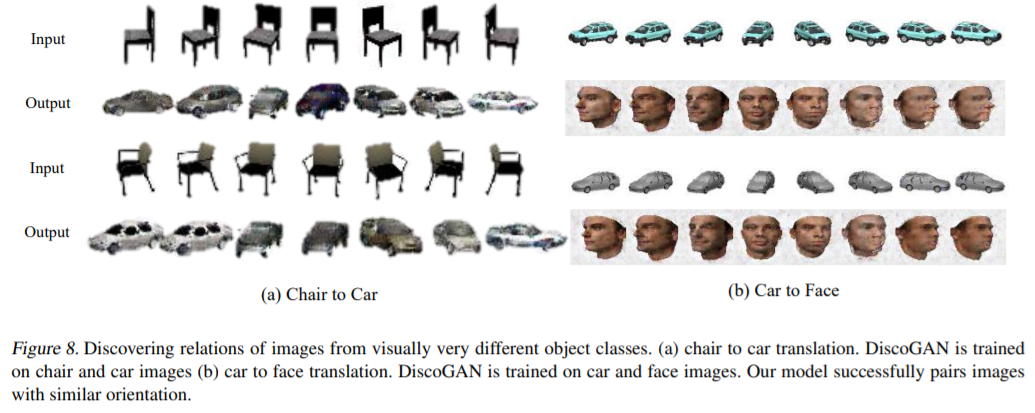

위의 그림 Figure 8은 세 가지 데이터 세트 모두 방위각 회전에 따라 달라지는 것을 보여준다. (a) 부분은 의자에서 자동차로, (b) 부분은 자동차에서 얼굴로 image를 변환 한 결과이다. 변환된 output는 input의 회전 특성과 명확하게 일치함과 동시에 자동차 및 얼굴과 같은 domain의 시각적 특성을 각각 유지하는 것을 알 수 있다.

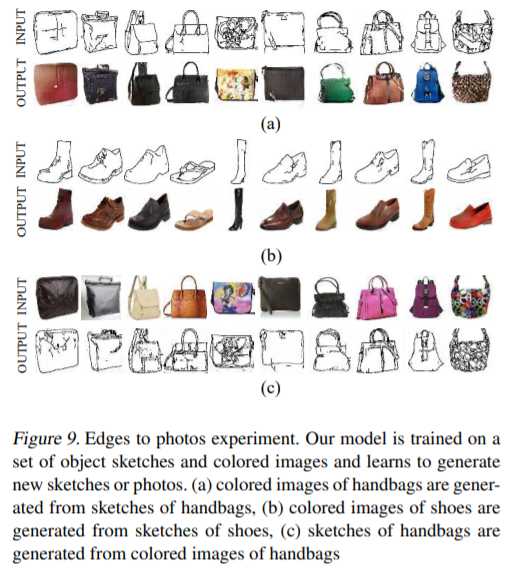

위의 그림 Figure 9는 신발과 핸드백에 대한 Edges-to-Photo와 Photo-to-Edges에 대한 결과이다. 알고 있듯이 Edges-to-Photo의 경우 같은 항목에 대해 여러 색상 이미지를 생성 할 수 있는 1:N 문제이다. 결론적으로 그림을 보면 알 수 있듯이 매우 사실적인 image를 잘 생성한 것을 알 수 있다.